# Kaggle Project: Suicide and Depression Detection

**Objective:**

To create a text classifier to detect suicidal intentions on social media.


**Dataset details:**

The dataset is a collection of posts from the "SuicideWatch" and "depression" subreddits of the Reddit platform. The posts are collected using Pushshift API. All posts that were made to "SuicideWatch" from Dec 16, 2008(creation) till Jan 2, 2021, were collected while "depression" posts were collected from Jan 1, 2009, to Jan 2, 2021. All posts collected from SuicideWatch are labeled as suicide, While posts collected from the depression subreddit are labeled as depression. Non-suicide posts are collected from r/teenagers.


**Kaggle source project:**
- https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch

## Imports

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

from libraries.models.bert_app import BERTHuggingFaceClassification
from libraries.utils.statistics import (
    print_classification_metrics,
    print_auc_and_plot_precision_recall,
    df_downsample,
    confidence_sample_size,
    interest_proportion
)
from libraries.utils.dataviz import(
    plot_roc_curve,
    model_evaluation_cm,
    barplot_series,
    evalmetrics_multicategory
)
from libraries.utils.file import switch_label

In [3]:
DATA_DIR = os.path.join(os.getcwd(), 'data')
MODELS_DIR = os.path.join(os.getcwd(), 'models_data')

## Loading dataset

In [4]:
df_dataset = pd.read_csv(os.path.join(DATA_DIR, 'suicide_detection.csv'), 
                         sep=',')[['text', 'class']]

In [ ]:
df_dataset.value_counts('class')

class
non-suicide    116037
suicide        116037
Name: count, dtype: int64

In [6]:
df_dataset['character_length'] = [len(x) for x in df_dataset['text']]

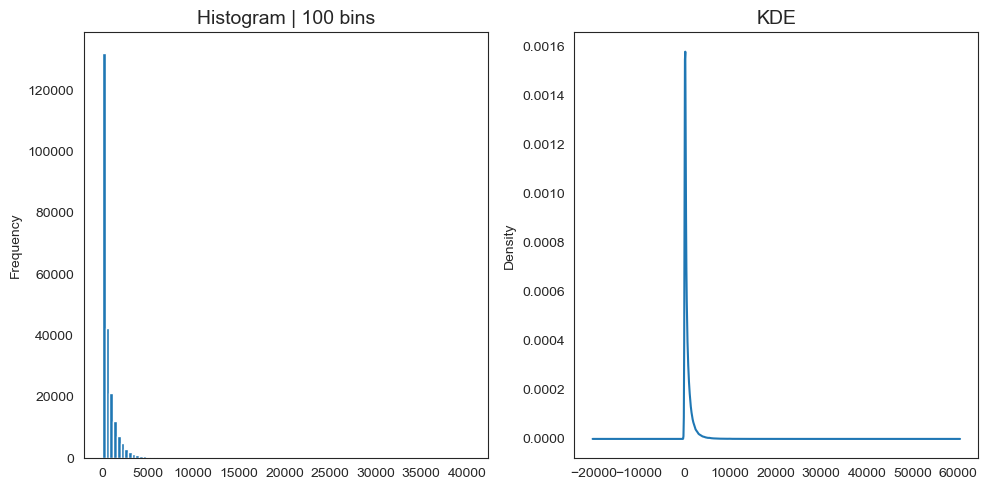

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

n_bins= 100

df_dataset['character_length'].plot(kind='hist', bins=n_bins, ax=axs[0])
axs[0].set_title(f"Histogram | {n_bins} bins", fontsize=14)

df_dataset['character_length'].plot(kind='kde', ax=axs[1])
axs[1].set_title("KDE", fontsize=14)

plt.tight_layout() 
plt.show()

## Model Training

In [ ]:
!pip uninstall torch torchvision torchaudio


In [ ]:
!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1 -f https://download.pytorch.org/whl/torch_stable.html

In [26]:
print(torch.cuda.is_available())

False


In [23]:
import torch

print(torch.__version__)  # Verifique a versão do PyTorch
print(torch.cuda.is_available())  # Verifique se CUDA está disponível
print(torch.cuda.current_device())  # Verifique o ID da GPU
print(torch.cuda.get_device_name())  # Nome da GPU, se disponível

2.5.1+cpu
False
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\amilt\anaconda3\envs\env_bert_use_case\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\amilt\AppData\Local\Temp\ipykernel_194580\4065383790.py", line 5, in <module>
    print(torch.cuda.current_device())  # Verifique o ID da GPU
  File "c:\Users\amilt\anaconda3\envs\env_bert_use_case\lib\site-packages\torch\cuda\__init__.py", line 940, in current_device
  File "c:\Users\amilt\anaconda3\envs\env_bert_use_case\lib\site-packages\torch\cuda\__init__.py", line 310, in _lazy_init
    idx = obj.get_device() if obj.is_cuda else -1
AssertionError: Torch not compiled with CUDA enabled

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\amilt\anaconda3\envs\env_bert_use_case\lib\site-packages\IPython\core\interactiveshell.py", line 2102, in showtraceback
    stb = self.Interactiv

In [ ]:
dict_labels = {"suicide":1, "non-suicide":0}
df_dataset['y'] = switch_label(dict_labels, df_dataset['class'])

foundation_name = "bert-base-uncased"
model = BERTHuggingFaceClassification(
        dict_labels=dict_labels,
        preprocess=None,
        foundation_model=foundation_name
        )

Modelo BERT inicializado com bert-base-uncased
  Config:
    - 12 camadas
    - 110M parâmetros
    - setado para cpu



## Model testing